### 1. Creating Window Functions for Power Spectra Correction


In this notebook we read the K-band beam transfer function for WMAP to compute and save:
- *Pixel Window Function*: $|w_{\ell}|^2$: To correct for pixel discretization efffects, i.e., binning.
- *Beam Window Function*: $B_{\ell}^2$: To correct for the angular sensitivity of the instrument.

Both are in Fourier-space (or $\ell$-space). They are necessary to correct the measured power spectrum we will compute later, such that 
$$
C_{\ell} \propto 1/ (|w_{\ell}|^{2} B_{\ell}^2)
$$

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp 
import pymaster as nmt

**1.1 Extract the WMAP Beam Transfer Function (BTF) and plot it.**

We see how efficiency decreaser for greater $\ell$ values (i.e., angular resolution)

Shape of beam_wmap_k: (751,)


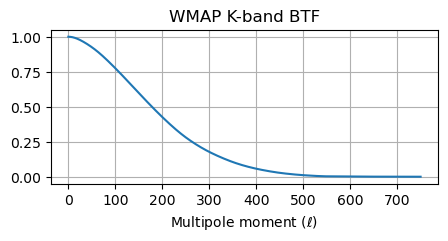

In [20]:
beam_file = '../data/window/wmap_k-band_BTF.txt'
beam_wmap_k = np.loadtxt(beam_file).T[1]  


print('Shape of beam_wmap_k:', beam_wmap_k.shape)
ell_original = np.arange(beam_wmap_k.shape[0])  # Corresponding ell values

# Plot it
plt.figure(figsize=(5, 2))
plt.plot(ell_original, beam_wmap_k)
plt.xlabel(r"Multipole moment ($\ell$)")
plt.title("WMAP K-band BTF")
plt.grid()
plt.show()

**1.2 Define the multipole binning, interpolate the BTF and save it**

(2, 102)


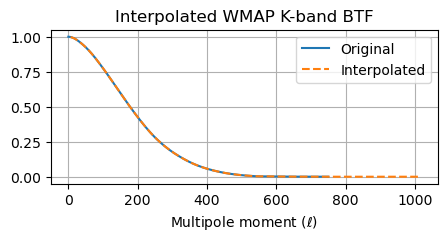

In [22]:
# Define binning parameters
nside = 512
bin_width = 10

# Linear binning
b = nmt.NmtBin(nside, nlb=bin_width, lmax=2*nside)
ell = b.get_effective_ells()  # Effective ell values for the bins

# Interpolate the beam transfer function to match the effective ell values
bl_wmap_k = np.interp(ell, ell_original, beam_wmap_k)

# array to save
bl_k = np.array([ell, bl_wmap_k])
print(bl_k.shape)
np.savetxt('../results/window/beam_wmap_k.txt', bl_k)

# Plot the interpolated beam transfer function
plt.figure(figsize=(5, 2))
plt.plot(ell_original, beam_wmap_k, label="Original")
plt.plot(ell, bl_wmap_k, label="Interpolated", linestyle="--")
plt.xlabel(r"Multipole moment ($\ell$)")
plt.title("Interpolated WMAP K-band BTF")
plt.legend()
plt.grid()
plt.show()

**1.3 Compute Pixel Window Funciton**

(2, 102)


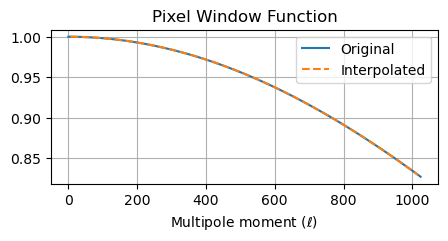

In [23]:
# Compute the pixel window function for the given HEALPix resolution

lmax = 2*512
wpix = hp.pixwin(nside, lmax=lmax, pol=False)
wp = np.interp(ell, np.arange(1024+1), wpix)

# save it 
ww = np.array([ell, wp])
print(ww.shape)
np.savetxt('../results/window/window_pixel_0512.txt', ww)

# Plot the pixel window function
plt.figure(figsize=(5, 2))
plt.plot(np.arange(lmax + 1), wpix, label="Original")
plt.plot(ell, wp, label="Interpolated", linestyle="--")
plt.xlabel(r"Multipole moment ($\ell$)")
plt.title("Pixel Window Function")
plt.legend()
plt.grid()
plt.show()